In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
data = pd.read_csv("save.csv").to_numpy()
time_series_data = pd.Series(data[2, :], name="Time_Series_Data")
train_data = time_series_data[:96]
test_data = time_series_data[96:]

D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


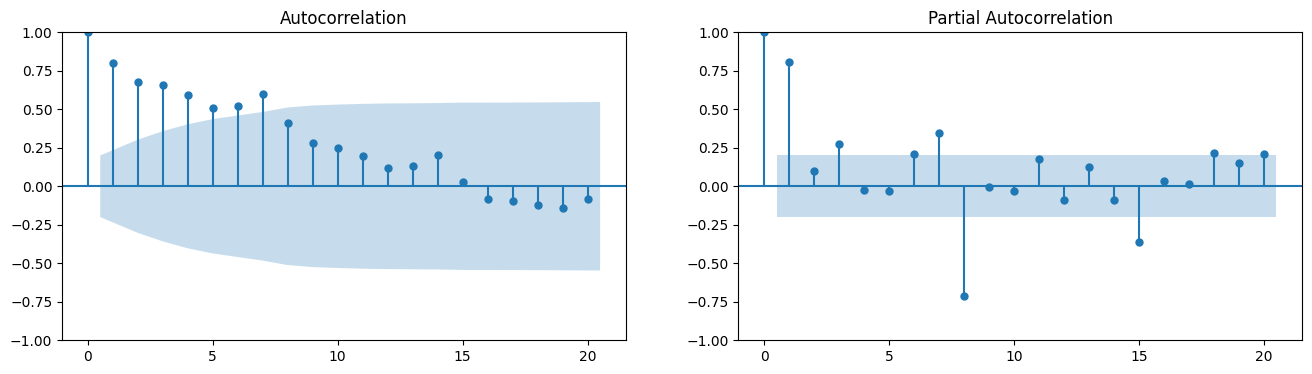

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train_data, ax=ax[0])
plot_pacf(train_data, ax=ax[1])
plt.show()

In [4]:
def evaluate_arima_model(train, test, p, d, q):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        # mse = mean_squared_error(test, predictions)
        mse = mean_absolute_error(test, predictions)
        return mse
    except:
        return np.inf

best_mse = np.inf
best_order = None

for p in range(0, 5):  # Modify the range according to your observations from the ACF and PACF plots
    for d in range(0, 3):
        for q in range(0, 5):
            mse = evaluate_arima_model(train_data, test_data, p, d, q)
            if mse < best_mse:
                best_mse = mse
                best_order = (p, d, q)

print(f"Best ARIMA Order: {best_order}")

D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters fo

Best ARIMA Order: (4, 2, 2)


Mean Squared Error: 3218.7826063811262


D:\Study\Master_SpringSemester\Course\CE 290\StemGNN_CE290\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


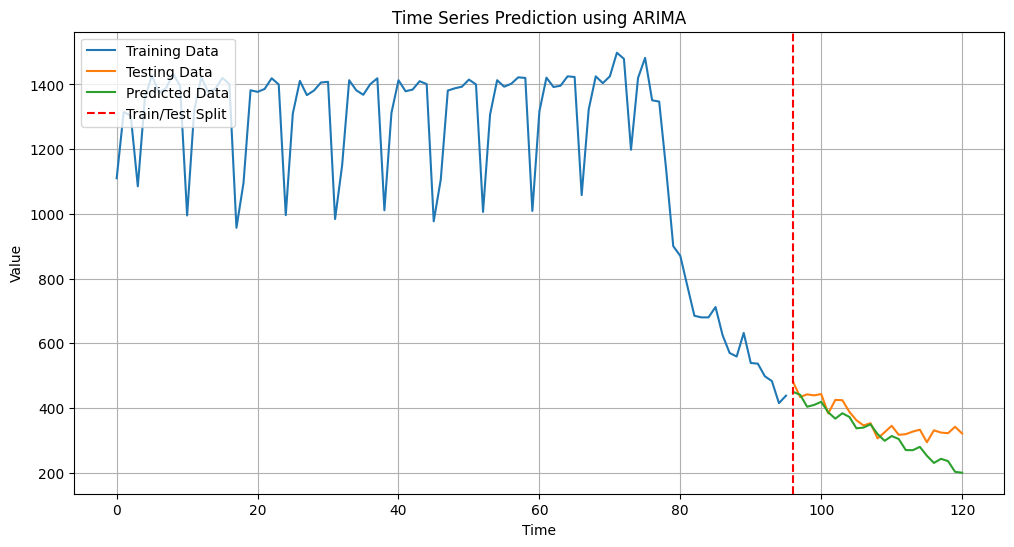

In [5]:
# p = 1
# d = 2
# q = 0
q = 3

arima_model = ARIMA(train_data, order=(p, d, q))
arima_model_fit = arima_model.fit()
predictions = arima_model_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Testing Data")
plt.plot(test_data.index, predictions, label="Predicted Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.axvline(x=96, color="r", linestyle="--", label="Train/Test Split")
plt.title("Time Series Prediction using ARIMA")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

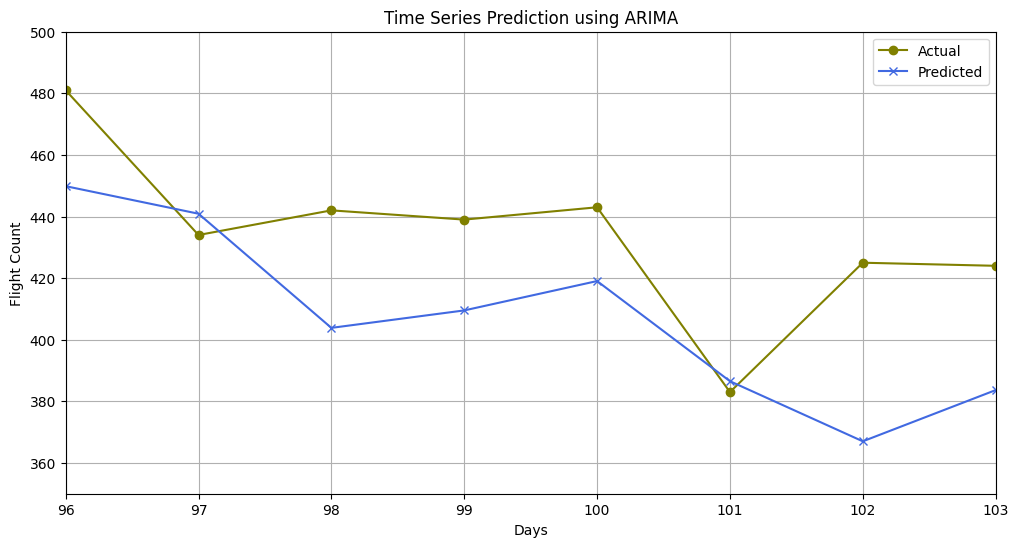

In [6]:
plt.figure(figsize=(12, 6))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Actual", marker="o", color="olive")
plt.plot(test_data.index, predictions, label="Predicted", marker="x", color="royalblue")
plt.xlabel("Days")
plt.ylabel("Flight Count")
# plt.axvline(x=96, color="r", linestyle="--", label="Train/Test Split")
plt.title("Time Series Prediction using ARIMA")
plt.xlim([96, 103])
plt.ylim([350, 500])
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [7]:
n_days = 7
predictions_7_days = predictions[:n_days]
test_data_7_days = test_data[:n_days]

mse_7_days = mean_squared_error(test_data_7_days, predictions_7_days)
rmse_7_days = np.sqrt(mse_7_days)
mae_7_days = mean_absolute_error(test_data_7_days, predictions_7_days)

print(f"Root Mean Squared Error (RMSE): {rmse_7_days:.4f}")
print(f"Mean Absolute Error (MAE): {mae_7_days:.4f}")

Root Mean Squared Error (RMSE): 32.2738
Mean Absolute Error (MAE): 27.3097
